In [34]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query4 = """
SELECT 
  cast(selectsystems.created as date) - cast(experts.created as date) as "Period", 
  cast(experts.created as date) as "Experts Registration Date", 
  cast(selectsystems.created as date) as "Experts Job Onboarding Date",
  array_to_string(experts.new_specialties, '', '*')
FROM 
  experts 
  LEFT JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  WHERE selectsystems.record_id IS NOT NULL
  AND 
  (array_to_string(experts.new_specialties, '', '*') IS NOT NULL AND array_to_string(experts.new_specialties, '', '*') != '')
  ORDER BY "Period" ASC
  """
dataset4 = sqlio.read_sql_query(query4,conn)
df4 = pd.DataFrame(data=dataset4)
print(df4)

     Period Experts Registration Date Experts Job Onboarding Date  \
0         0                2021-03-03                  2021-03-03   
1         0                2021-03-03                  2021-03-03   
2         0                2021-03-03                  2021-03-03   
3         0                2021-03-22                  2021-03-22   
4         0                2021-03-02                  2021-03-02   
..      ...                       ...                         ...   
153     469                2021-02-11                  2022-05-26   
154     470                2021-03-03                  2022-06-16   
155     471                2021-03-02                  2022-06-16   
156     475                2021-03-03                  2022-06-21   
157     495                2021-02-11                  2022-06-21   

       array_to_string  
0    recJuFpH0eM4XKBzS  
1    recJuFpH0eM4XKBzS  
2    reckt9OCytoHveYHm  
3    recLOeen0NbQSPq3S  
4    reckt9OCytoHveYHm  
..                 ..

In [27]:
import pandas as pd
import pandasql as ps
import pandas.io.sql as sqlio

#SelectSystems
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query4 = """
SELECT 
  cast(selectsystems.created as date) - cast(experts.created as date) as "Period", 
  cast(experts.created as date) as "Experts Registration Date", 
  cast(selectsystems.created as date) as "Experts Job Onboarding Date",
  experts.new_specialties as "Experts Specialties"
FROM 
  experts 
  LEFT JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  WHERE selectsystems.record_id IS NOT NULL
  ORDER BY "Period" ASC
  """
dataset4 = sqlio.read_sql_query(query4,conn)
selectsystems_df = pd.DataFrame(data=dataset4)

#Experts
df1 = pd.read_csv('Experts-Data Analytics.csv')
experts_df = pd.DataFrame(df1)
ps.sqldf("""
SELECT 
* 
FROM 
experts_df
LEFT JOIN 
selectsystems_df 
ON selectsystems_df.expert = experts.id 
""")

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 3 - probably unsupported type.
[SQL: INSERT INTO selectsystems ("Period", "Experts Registration Date", "Experts Job Onboarding Date", "Experts Specialties") VALUES (?, ?, ?, ?)]
[parameters: ((0, '2021-03-03', '2021-03-03', ['reckt9OCytoHveYHm']), (0, '2021-03-02', '2021-03-02', []), (0, '2021-03-03', '2021-03-03', ['recJuFpH0eM4XKBzS']), (0, '2021-03-22', '2021-03-22', ['recLOeen0NbQSPq3S']), (0, '2021-03-03', '2021-03-03', ['recJuFpH0eM4XKBzS']), (0, '2021-03-02', '2021-03-02', ['reckt9OCytoHveYHm']), (0, '2021-03-02', '2021-03-02', ['recJuFpH0eM4XKBzS']), (0, '2021-03-22', '2021-03-22', [])  ... displaying 10 of 212 total bound parameter sets ...  (475, '2021-03-03', '2022-06-21', ['rectqdANRb5XpQXOm']), (495, '2021-02-11', '2022-06-21', ['reckt9OCytoHveYHm']))]
(Background on this error at: https://sqlalche.me/e/14/rvf5)

In [18]:
!pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=eec438ed6a001d4b112c8f38a34d0c75d386cace13bb3a375e3c93d6524ee706
  Stored in directory: c:\users\nik harith\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [45]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query4 = """
WITH original AS
(SELECT 
  cast(selectsystems.created as date) - cast(experts.created as date) as "Period", 
  cast(experts.created as date) as "Experts Registration Date", 
  cast(selectsystems.created as date) as "Experts Job Onboarding Date",
  specialties.name as "Specialty"
FROM 
  experts 
  LEFT JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  INNER JOIN specialties ON array_to_string(experts.new_specialties, '', '*') = specialties.id
  WHERE selectsystems.record_id IS NOT NULL
  AND 
  (array_to_string(experts.new_specialties, '', '*') IS NOT NULL AND array_to_string(experts.new_specialties, '', '*') != '')
  ORDER BY "Period" ASC)
  
SELECT count(*), original."Specialty" as "Specialty", 
case when original."Period" >= 0 and original."Period" <= 30    then '  1'
            when original."Period" > 30 and original."Period" <= 60   then ' 2'
            when original."Period" > 60 and original."Period" <= 90  then ' 3'
            when original."Period" > 90 and original."Period" <= 120   then ' 4'
            when original."Period" > 120 and original."Period" <= 150  then ' 5'
            when original."Period" > 150 and original."Period" <= 180  then ' 6'
            when original."Period" > 180 and original."Period" <= 210    then ' 7'
            when original."Period" > 210 and original."Period" <= 240   then ' 8'
            when original."Period" > 240 and original."Period" <= 270  then ' 9'
            when original."Period" > 270 and original."Period" <= 300   then ' 10'
            when original."Period" > 300 and original."Period" <= 330  then ' 11'
            when original."Period" > 330 and original."Period" <= 365  then ' 12'
            when original."Period" > 365 and original."Period" <= 730  then ' 12-24'
           else 'Month 24+' end as "Monthly Period" 
FROM original
GROUP BY 2, 3
ORDER BY 3
  """
dataset4 = sqlio.read_sql_query(query4,conn)
df4 = pd.DataFrame(data=dataset4)
print(df4)

    count                    Specialty Monthly Period
0       7                  Advertising              1
1       2     Community / Social Media              1
2       4                  Copywriting              1
3       1             Data & Analytics              1
4       3  Development & Product-Build              1
..    ...                          ...            ...
74      1                  Advertising              9
75      3  Development & Product-Build              9
76      2               Graphic Design              9
77      1                    Retention              9
78      2                          SEO              9

[79 rows x 3 columns]


Monthly Period                     1.0   2.0   3.0   4.0   5.0   6.0   7.0   \
Specialty                                                                     
Advertising                           7     0     4     2     3     1     4   
Community / Social Media              2     3     0     1     1     2     0   
Copywriting                           4     3     4     4     3     2     2   
Data & Analytics                      1     0     0     0     0     0     0   
Development & Product-Build           3     0     0     0     2     1     0   
Fractional Leader (Ongoing Basis)     0     1     0     0     0     0     0   
Graphic Design                        5     3     2     1     2     2     4   
No-and-Low Code                       0     1     0     0     0     0     0   
Partner Management                    1     1     0     0     0     0     0   
Retention                             2     1     1     0     1     1     3   
SEO                                   0     1     1 

<AxesSubplot:title={'center':'How Long Does It Take for Experts to Onboard Jobs Post Registration? - Data Analysis Prepared by Nic Rayce'}, xlabel='Monthly Period', ylabel='Specialty'>

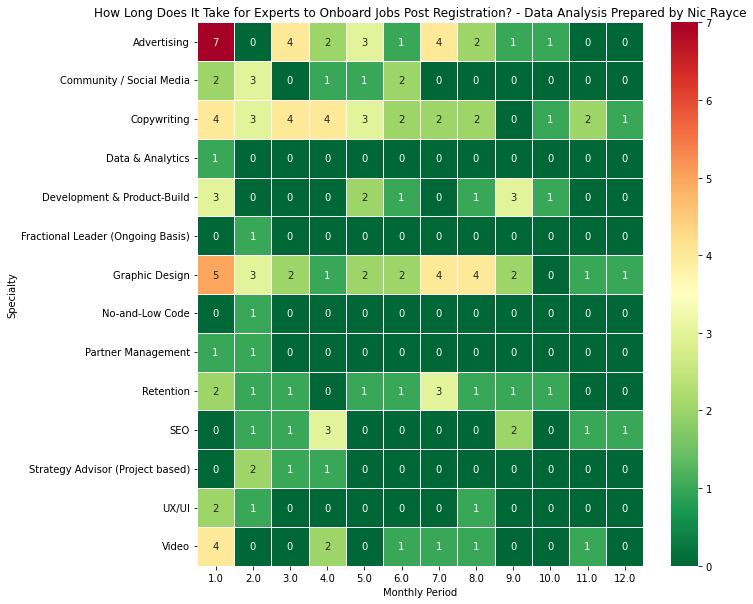

In [89]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query4 = """
WITH original AS
(SELECT 
  cast(selectsystems.created as date) - cast(experts.created as date) as "Period", 
  cast(experts.created as date) as "Experts Registration Date", 
  cast(selectsystems.created as date) as "Experts Job Onboarding Date",
  specialties.name as "Specialty"
FROM 
  experts 
  LEFT JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  INNER JOIN specialties ON array_to_string(experts.new_specialties, '', '*') = specialties.id
  WHERE selectsystems.record_id IS NOT NULL
  AND 
  (array_to_string(experts.new_specialties, '', '*') IS NOT NULL AND array_to_string(experts.new_specialties, '', '*') != '')
  ORDER BY "Period" ASC)
  
SELECT count(*) as "Count", original."Specialty" as "Specialty", 
cast(case when original."Period" >= 0 and original."Period" <= 30    then '  1'
            when original."Period" > 30 and original."Period" <= 60   then ' 2'
            when original."Period" > 60 and original."Period" <= 90  then ' 3'
            when original."Period" > 90 and original."Period" <= 120   then ' 4'
            when original."Period" > 120 and original."Period" <= 150  then ' 5'
            when original."Period" > 150 and original."Period" <= 180  then ' 6'
            when original."Period" > 180 and original."Period" <= 210    then ' 7'
            when original."Period" > 210 and original."Period" <= 240   then ' 8'
            when original."Period" > 240 and original."Period" <= 270  then ' 9'
            when original."Period" > 270 and original."Period" <= 300   then ' 10'
            when original."Period" > 300 and original."Period" <= 330  then ' 11'
            when original."Period" > 330 and original."Period" <= 365  then ' 12'
           else null end as integer) as "Monthly Period" 
FROM original
GROUP BY 2, 3
ORDER BY 1, 3
  """
dataset4 = sqlio.read_sql_query(query4,conn)
df4 = pd.DataFrame(data=dataset4)
pivot = pd.pivot_table(data=df4, index='Specialty', columns='Monthly Period', values='Count', fill_value=0).sort_values(by=['Specialty'])
print(pivot)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('How Long Does It Take for Experts to Onboard Jobs Post Registration? - Data Analysis Prepared by Nic Rayce')
sns.heatmap(pivot, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=ax)

     status Billing Style  SF Margin       Date
0  Inactive      Retainer  18.032787 2022-05-01
1  Inactive      Retainer  22.000000 2022-05-01
2  Inactive      Retainer  18.000000 2022-06-01
3  Inactive      Retainer  18.000000 2022-06-01


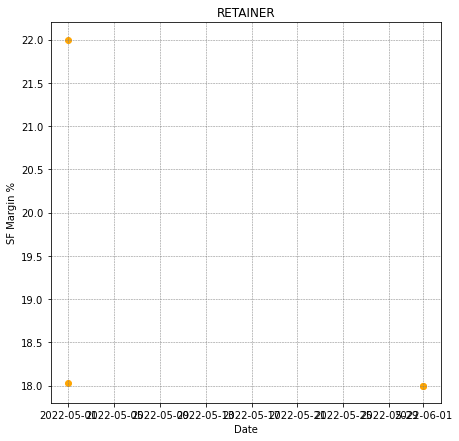

In [37]:
import psycopg2
import seaborn as sns
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    SELECT
    selectsystems.status,
    selectsystems.billing_style as "Billing Style",
    cast(selectsystems.sf as float)*100 as "SF Margin",
    date_trunc('month', selectsystems.status_last_modified) as "Date"
    FROM 
    selectsystems 
    WHERE 
    (selectsystems.status = 'Inactive' and 
    cast(selectsystems.status_last_modified as date) > '2022-05-01') and 
    (selectsystems.billing_style = 'Retainer')
    ORDER BY date_trunc('month', selectsystems.status_last_modified)
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

# Define Data
xdata1=df11a['Date']
ydata1=df11a['SF Margin']

plt.figure(figsize=(7, 7))
plt.title("RETAINER")
plt.xlabel('Date')
plt.ylabel('SF Margin %')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.scatter(xdata1, ydata1, color='orange')
plt.show()


In [46]:
import psycopg2
import seaborn as sns
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query11a = """
    WITH raw AS
    (SELECT
    selectsystems.status,
    selectsystems.billing_style as "Billing Style",
    cast(selectsystems.sf as float)*100 as "SF Margin",
    cast(selectsystems.status_last_modified as date) as "Date"
    FROM 
    selectsystems 
    WHERE 
    (selectsystems.status = 'Inactive' and 
    cast(selectsystems.status_last_modified as date) < '2022-04-25') and 
    (selectsystems.billing_style = 'Retainer')
    ORDER BY cast(selectsystems.created as date))
    
    select avg(nullif(raw."SF Margin", 'NaN')) FROM raw 
"""
dataset11a = sqlio.read_sql_query(query11a,conn)
df11a = pd.DataFrame(data=dataset11a)
df11a.to_csv('analysis11a.csv')
print(df11a)

     avg
0  22.75


    Percentage of Active Experts - ALL        Registration Month
0                             0.000000 2022-06-01 00:00:00+00:00
1                             6.451613 2022-05-01 00:00:00+00:00
2                            18.032787 2022-04-01 00:00:00+00:00
3                             8.000000 2022-03-01 00:00:00+00:00
4                             7.692308 2022-02-01 00:00:00+00:00
5                            10.526316 2022-01-01 00:00:00+00:00
6                             2.380952 2021-12-01 00:00:00+00:00
7                            10.526316 2021-11-01 00:00:00+00:00
8                            23.076923 2021-10-01 00:00:00+00:00
9                            12.195122 2021-09-01 00:00:00+00:00
10                           27.500000 2021-08-01 00:00:00+00:00
11                           17.000000 2021-07-01 00:00:00+00:00
12                           53.333333 2021-06-01 00:00:00+00:00
13                           58.333333 2021-05-01 00:00:00+00:00
14                       

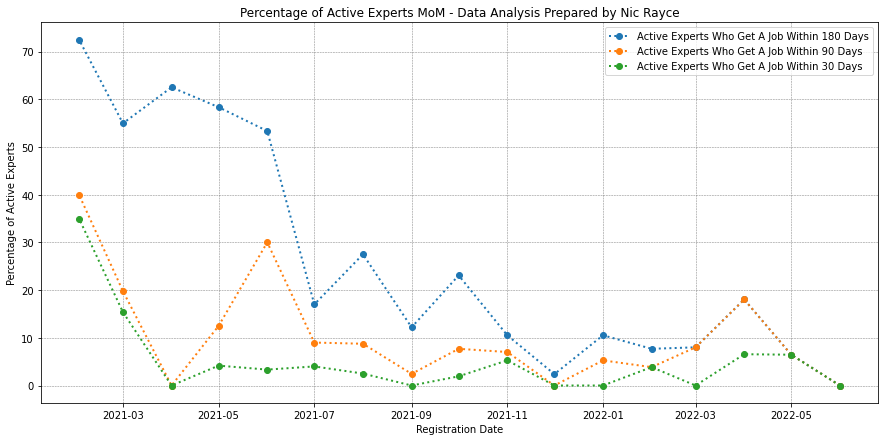

In [14]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts - ALL" , date_trunc('month', cast("source"."Date" as date)) as "Registration Month"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 30 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 30 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

query7 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 90 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 90 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset7 = sqlio.read_sql_query(query7,conn)
df7 = pd.DataFrame(data=dataset7)
print(df7)


# Define Data
xdata1=df5['Registration Month']
ydata1=df5['Percentage of Active Experts - ALL']
xdata2=df7['Registration Month']
ydata2=df7['Percentage of Active Experts within 90 Days']
xdata3=df6['Registration Month']
ydata3=df6['Percentage of Active Experts within 30 Days']

    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata3, ydata3, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active Experts Who Get A Job Within 180 Days', 'Active Experts Who Get A Job Within 90 Days' ,'Active Experts Who Get A Job Within 30 Days'])
plt.title("Percentage of Active Experts MoM - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
